## Chương 10: Deep Learning in Image Processing - Image Classification

#### __Bài tập 1:__ Để phân loại bộ dữ liệu MNIST bằng lớp FC (Fully Connected) với Keras, hãy viết một đoạn mã Python để trực quan hóa lớp đầu ra (những gì mạng nơ-ron nhìn thấy)

#### __Giải thích code__

#### 1. Nhập các thư viện cần thiết

In [ ]:
%pip install tensorflow
# numpy để xử lý mảng và tính toán số học
import numpy as np                                      
# matplotlib.pyplot để trực quan hóa dữ liệu, đặc biệt là hiển thị hình ảnh
import matplotlib.pyplot as plt                         
# nhập bộ dữ liệu MNIST từ keras, bao gồm các hình ảnh chữ số viết tay và nhãn tương ứng
from tensorflow.keras.datasets import mnist             
# Sequential để xây dựng mô hình mạng nơ-ron tuyến tính
from tensorflow.keras.models import Sequential          
# nhập các lớp Dense (mạng thần kinh hoàn toàn kết nối) và Flatten (biến đổi dữ liệu thành dạng phẳng)
from tensorflow.keras.layers import Dense, Flatten      
# to_categorical để chuyển đổi nhãn từ dạng số nguyên sang dạng one-hot encoding
from tensorflow.keras.utils import to_categorical       

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


#### 2. Tải và tiền xử lý dữ liệu

In [ ]:
# Tải bộ dữ liệu MNIST, chia thành tập huấn luyện (x_train, y_train) và tập kiểm tra (x_test, y_test)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Chuẩn hóa giá trị pixel từ khoảng [0, 255] xuống [0, 1] bằng cách chia cho 255. Điều này giúp cải thiện hiệu suất và tốc độ hội tụ của mô hình
x_train = x_train / 255.0
x_test = x_test / 255.0

# Chuyển đổi nhãn từ dạng số nguyên (0-9) sang dạng one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#### 3. Xây dựng và huấn luyện mô hình

In [ ]:
model = Sequential([
    # Biến đổi đầu vào từ ma trận 28x28 thành một vector phẳng có kích thước 784
    Flatten(input_shape=(28, 28)),  
    # Lớp Dense với 128 neuron và hàm kích hoạt ReLU giúp mô hình học các đặc trưng phi tuyến
    Dense(128, activation='relu'),  
    # Lớp Dense với 10 neuron và hàm kích hoạt Softmax dùng để phân loại các chữ số từ 0 đến 9
    Dense(10, activation='softmax') 
])

# Cấu hình quá trình huấn luyện mô hình với:
# optimizer='adam': sử dụng thuật toán tối ưu Adam, một trong những thuật toán tối ưu phổ biến và hiệu quả
# loss='categorical_crossentropy': hàm mất mát được sử dụng là categorical_crossentropy, phù hợp cho bài toán phân loại đa lớp
# metrics=['accuracy']: theo dõi độ chính xác trong quá trình huấn luyện
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Huấn luyện mô hình với các tham số:
# x_train, y_train: dữ liệu huấn luyện và nhãn tương ứng
# epochs=5: số lần lặp qua toàn bộ dữ liệu huấn luyện
# batch_size=32: kích thước từng batch trong quá trình huấn luyện
# validation_split=0.2: chia 20% dữ liệu huấn luyện để sử dụng làm tập xác thực trong quá trình huấn luyện
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8701 - loss: 0.4644 - val_accuracy: 0.9587 - val_loss: 0.1555
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9594 - loss: 0.1385 - val_accuracy: 0.9659 - val_loss: 0.1169
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9744 - loss: 0.0902 - val_accuracy: 0.9691 - val_loss: 0.1018
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9803 - loss: 0.0679 - val_accuracy: 0.9706 - val_loss: 0.0988
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9859 - loss: 0.0477 - val_accuracy: 0.9709 - val_loss: 0.0985


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


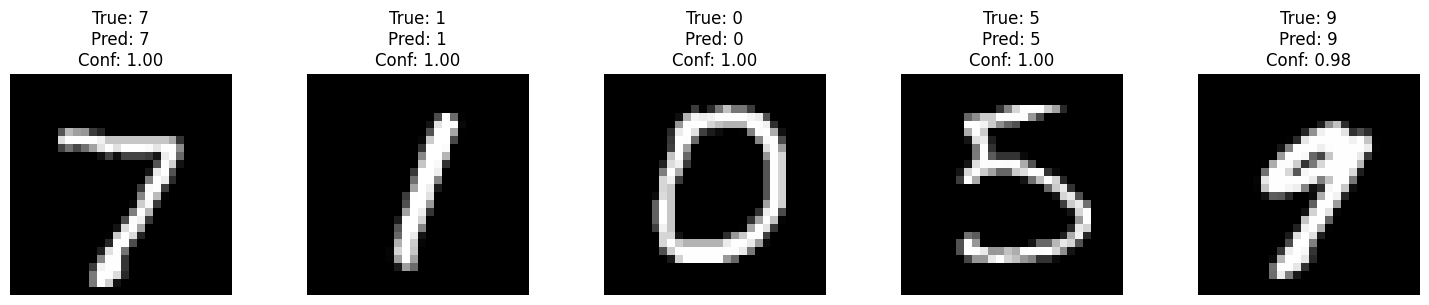

In [ ]:
# Danh sách các chỉ số của hình ảnh trong tập kiểm tra cần xem kết quả dự đoán
indices = [0, 5, 10, 15, 20]
# Số lượng hình ảnh sẽ được hiển thị
num_images = len(indices)       
# Tạo một hình với kích thước rộng 15 inch và cao 3 inch để hiển thị các hình ảnh cùng lúc
plt.figure(figsize=(15, 3))     

# Vòng lặp để duyệt qua từng chỉ số trong danh sách indices
for i, idx in enumerate(indices):
    # Lấy hình ảnh tại vị trí idx từ tập kiểm tra
    input_image = x_test[idx]
    # Dự đoán nhãn cho hình ảnh bằng mô hình. Hình ảnh được reshape thành kích thước (1, 28, 28) để phù hợp với định dạng đầu vào của mô hình
    output = model.predict(input_image.reshape(1, 28, 28))
    # Lấy nhãn dự đoán bằng cách chọn chỉ số có giá trị xác suất cao nhất trong kết quả dự đoán
    predicted_label = np.argmax(output)
    # Lấy nhãn thực tế bằng cách tìm chỉ số có giá trị bằng 1 trong nhãn one-hot encoding
    true_label = np.argmax(y_test[idx])
    # Hiển thị xác suất mà mô hình dự đoán cho nhãn đó
    confidence = output[0][predicted_label]

    # Chia figure thành 1 x num_images lưới và chọn ô thứ i + 1 để vẽ hình ảnh
    plt.subplot(1, num_images, i + 1)
    # Hiển thị hình ảnh ở chế độ grayscale
    plt.imshow(input_image, cmap='gray')
    # Đặt tiêu đề cho hình ảnh, bao gồm nhãn thực và nhãn dự đoán
    plt.title(f'True: {true_label}\nPred: {predicted_label}\nConf: {confidence:.2f}')
    # Tắt hiển thị trục tọa độ
    plt.axis('off')

# Tự động điều chỉnh các khoảng cách giữa các subplot để tránh chồng lên
plt.tight_layout()
# Lưu hình ảnh dưới dạng file jpg
plt.savefig('mnist_keras.jpg')
# Hiển thị toàn bộ figure với các hình ảnh và tiêu đề tương ứng
plt.show()